In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk import word_tokenize
import csv


from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE

In [ ]:
!pip install missingno
!pip install langdetect googletrans==4.0.0-rc1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=8e933c5bb55f2b862abc7af53d2b532d836733ba6609dcd777154d5d2247853d
  Stored in directory: /root/.cache/pip/wheels/39/17/6f/66a045ea3d168826074691b4b787b8f324d3f646d755443fda
  Created wheel for

# **DATA COLLECTING**

In [ ]:
# daftar_file = [
#     {"input": "/content/Rasis 1 bersih.csv", "drop": ["no"], "output": "Rasis 1 Bersih Kinclong.csv"},
#     {"input": "/content/Rasis 2.csv", "drop": ["HS","Abusive","HS_Individual","HS_Group","HS_Religion","HS_Physical","HS_Gender",
#                                                "HS_Other","HS_Weak","HS_Moderate","HS_Strong"], "output": "Rasis 2 Bersih Kinclong.csv"},
#     {"input": "/content/Rasis 3.csv", "drop": ["source", "pornografi","radikalisme","pencemaran_nama_baik"], "output": "Rasis 3 Bersih Kinclong.csv"},
#     {"input": "/content/Rasis 4.csv", "drop": ["source", "pornografi","radikalisme","pencemaran_nama_baik"], "output": "Rasis 4 Bersih Kinclong.csv"}
# ]

# **DATA SELECTION**

In [ ]:
# for item in daftar_file:
#     try:
#         df = pd.read_csv(item["input"], encoding="ISO-8859-1")

#         df = df.drop(columns=[kol for kol in item["drop"] if kol in df.columns], errors='ignore')

#         df.to_csv(item["output"], index=False)
#         print(f"{item['input']} diproses dan disimpan sebagai {item['output']}")

#     except Exception as e:
#         print(f"Gagal memproses {item['input']}: {e}")

# file_output = [
#     "Rasis 1 Bersih Kinclong.csv",
#     "Rasis 2 Bersih Kinclong.csv",
#     "Rasis 3 Bersih Kinclong.csv",
#     "Rasis 4 Bersih Kinclong.csv"
# ]

# for file in file_output:
#     try:
#         print(f"\n Menampilkan 5 baris pertama dari: {file}")
#         df = pd.read_csv(file, encoding='ISO-8859-1')
#         print(df.head(5))
#     except Exception as e:
#         print(f"Gagal membaca {file}: {e}")

# **DATA INTEGRATION**

In [ ]:
# csv_induk = "/content/Rasis 1 Bersih Kinclong.csv"
# csv_tambahan = ["/content/Rasis 2 Bersih Kinclong.csv", "/content/Rasis 3 Bersih Kinclong.csv", "/content/Rasis 4 Bersih Kinclong.csv"]

# df_induk = pd.read_csv(csv_induk)

# dataframes = [df_induk]

# for file in csv_tambahan:
#     df = pd.read_csv(file, skiprows=1, header=None,encoding='ISO-8859-1')
#     df.columns = df_induk.columns
#     dataframes.append(df)

# df_gabungan = pd.concat(dataframes, ignore_index=True)

# df_gabungan.to_csv("RASIS.csv", index=False)

# print("CSV berhasil digabungkan ke dalam 'RASIS.csv'")

## **Load Data**

In [ ]:
data = pd.read_csv("/content/RASIS.csv", engine='python')
data

,tweets,label
0,Trus nih buat yg nanya kenapa gak dibangun di ...,0
1,PLAY & Let The Fun Begin ð±\nLike + RT + Cli...,0
2,Papua adalah bagian dari NKRI\n#DukungOtsusPap...,0
3,Akar konflik harus dibicarakan.\nDan dicari ti...,0
4,"""Saya minta kita semua jadi orang Papua. Artin...",0
...,...,...
21623,Mas. Sebenarnya aku gamau bully mas tp kek nya...,0
21624,"Kdang ngaku nicky minaj, kdang beyonce, kdang ...",0
21625,"Time kemas sesuatu tadi, terfikir jugak botol ...",0
21626,"@BasherRL heh kontol, jan sok pemes lu di rp, ...",0


# **EDA**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21628 entries, 0 to 21627
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  21628 non-null  object
 1   label   21628 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 338.1+ KB


In [ ]:
data.columns.tolist()

['tweets', 'label']

In [ ]:
data.isnull().sum()

,0
tweets,0
label,0


In [ ]:
data.duplicated().sum()

np.int64(897)

In [ ]:
data = data.drop_duplicates()

print("Jumlah data setelah hapus duplikat:", len(data))

Jumlah data setelah hapus duplikat: 20731


Jumlah masing-masing label:
label
0    18839
1     1892
Name: count, dtype: int64


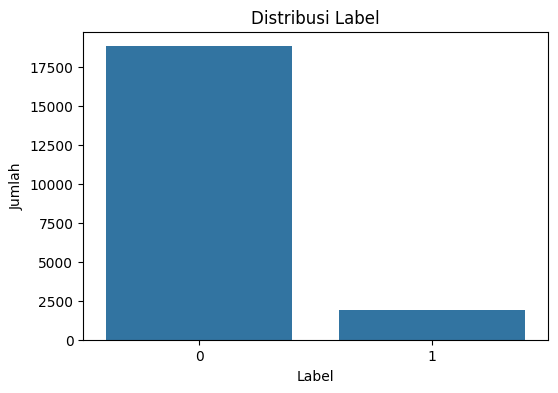

In [ ]:
label_col = 'label'

if label_col in data.columns:
    label_counts = data[label_col].value_counts()
    print("Jumlah masing-masing label:")
    print(label_counts)

    plt.figure(figsize=(6, 4))
    sns.countplot(x=data[label_col], order=label_counts.index)
    plt.title("Distribusi Label")
    plt.xlabel("Label")
    plt.ylabel("Jumlah")
    plt.show()

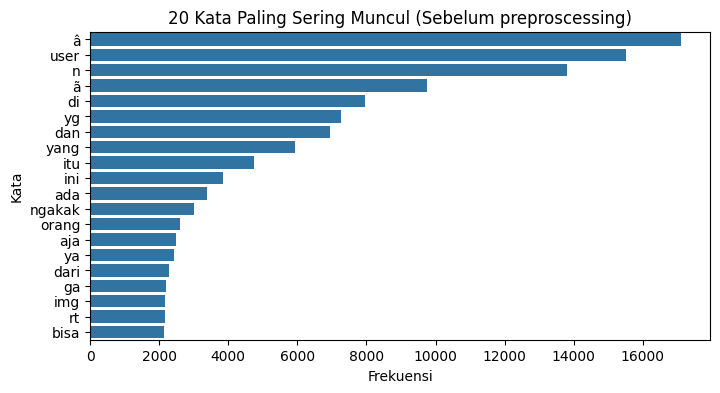

In [ ]:
text_cols = 'tweets'

all_words = ' '.join(data[text_cols].dropna().astype(str)).lower()
all_words = re.findall(r'\b\w+\b', all_words)
common_words = Counter(all_words).most_common(20)

words, freqs = zip(*common_words)

plt.figure(figsize=(8, 4))
sns.barplot(x=list(freqs), y=list(words))
plt.title("20 Kata Paling Sering Muncul (Sebelum preproscessing)")
plt.xlabel("Frekuensi")
plt.ylabel("Kata")
plt.show()

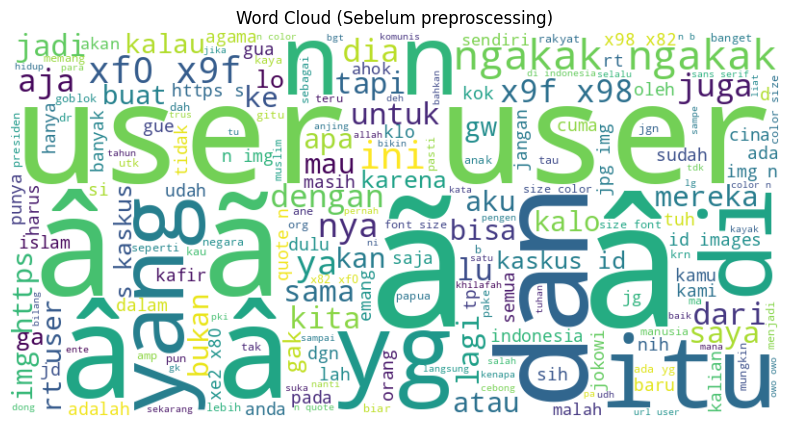

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud (Sebelum preproscessing)")
plt.show()

# **PREPROCESSING**

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def cleaningText(text):
    if not isinstance(text, str):
        return ""

    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)
    text = re.sub(r'\bRT\b', '', text)
    text = re.sub(r"https?://\S+|www\.\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = text.strip()

    return text

In [ ]:
data['cleaned_data'] = data['tweets'].apply(cleaningText)
data

<ipython-input-17-fdd74ee1cbc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_data'] = data['tweets'].apply(cleaningText)


,tweets,label,cleaned_data
0,Trus nih buat yg nanya kenapa gak dibangun di ...,0,Trus nih buat yg nanya kenapa gak dibangun di ...
1,PLAY & Let The Fun Begin ð±\nLike + RT + Cli...,0,PLAY Let The Fun Begin Like Click Did ...
2,Papua adalah bagian dari NKRI\n#DukungOtsusPap...,0,Papua adalah bagian dari NKRI
3,Akar konflik harus dibicarakan.\nDan dicari ti...,0,Akar konflik harus dibicarakan Dan dicari titi...
4,"""Saya minta kita semua jadi orang Papua. Artin...",0,Saya minta kita semua jadi orang Papua Artinya...
...,...,...,...
21621,Iya miris banget. Smua gara2 pengaruh barat ni...,0,Iya miris banget Smua gara pengaruh barat nih ...
21622,"Kk luna, harus kuat ya! Harus sabar ngadepin s...",0,Kk luna harus kuat ya Harus sabar ngadepin sik...
21623,Mas. Sebenarnya aku gamau bully mas tp kek nya...,0,Mas Sebenarnya aku gamau bully mas tp kek nya ...
21624,"Kdang ngaku nicky minaj, kdang beyonce, kdang ...",0,Kdang ngaku nicky minaj kdang beyonce kdang ar...


In [ ]:
def casefoldingText(text):
    text = text.lower()
    return text

In [ ]:
data['lower_data'] = data['cleaned_data'].apply(casefoldingText)
data

<ipython-input-19-4773c938bcef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lower_data'] = data['cleaned_data'].apply(casefoldingText)


,tweets,label,cleaned_data,lower_data
0,Trus nih buat yg nanya kenapa gak dibangun di ...,0,Trus nih buat yg nanya kenapa gak dibangun di ...,trus nih buat yg nanya kenapa gak dibangun di ...
1,PLAY & Let The Fun Begin ð±\nLike + RT + Cli...,0,PLAY Let The Fun Begin Like Click Did ...,play let the fun begin like click did ...
2,Papua adalah bagian dari NKRI\n#DukungOtsusPap...,0,Papua adalah bagian dari NKRI,papua adalah bagian dari nkri
3,Akar konflik harus dibicarakan.\nDan dicari ti...,0,Akar konflik harus dibicarakan Dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...
4,"""Saya minta kita semua jadi orang Papua. Artin...",0,Saya minta kita semua jadi orang Papua Artinya...,saya minta kita semua jadi orang papua artinya...
...,...,...,...,...
21621,Iya miris banget. Smua gara2 pengaruh barat ni...,0,Iya miris banget Smua gara pengaruh barat nih ...,iya miris banget smua gara pengaruh barat nih ...
21622,"Kk luna, harus kuat ya! Harus sabar ngadepin s...",0,Kk luna harus kuat ya Harus sabar ngadepin sik...,kk luna harus kuat ya harus sabar ngadepin sik...
21623,Mas. Sebenarnya aku gamau bully mas tp kek nya...,0,Mas Sebenarnya aku gamau bully mas tp kek nya ...,mas sebenarnya aku gamau bully mas tp kek nya ...
21624,"Kdang ngaku nicky minaj, kdang beyonce, kdang ...",0,Kdang ngaku nicky minaj kdang beyonce kdang ar...,kdang ngaku nicky minaj kdang beyonce kdang ar...


In [ ]:
from langdetect import detect
from googletrans import Translator
import pandas as pd

translator = Translator()

def translate_if_english(text):
    try:
        lang = detect(text)
        if lang == 'en':
            translated = translator.translate(text, src='en', dest='id')
            return translated.text
        else:
            return text
    except:
        return "Error"

data['Translated'] = data['lower_data'].apply(translate_if_english)

<ipython-input-20-016cd56ff3a3>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Translated'] = data['lower_data'].apply(translate_if_english)


In [ ]:
import csv
import pandas as pd

def load_singkatan_dictionary(csv_file):
    with open(csv_file, mode='r', encoding='latin-1') as file:
        return dict(csv.reader(file))

singkatan = load_singkatan_dictionary("/content/Kamus Singkatan Indonesia.csv")

def replace_singkatan(text):
    return ' '.join(singkatan.get(word, word) for word in text.split())

data['Singkatan'] = data['Translated'].apply(replace_singkatan)
data['Singkatan'] = data['Singkatan'].str.lower()
data

<ipython-input-21-a8376aa7ccd6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Singkatan'] = data['Translated'].apply(replace_singkatan)
<ipython-input-21-a8376aa7ccd6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Singkatan'] = data['Singkatan'].str.lower()


,tweets,label,cleaned_data,lower_data,Translated,Singkatan
0,Trus nih buat yg nanya kenapa gak dibangun di ...,0,Trus nih buat yg nanya kenapa gak dibangun di ...,trus nih buat yg nanya kenapa gak dibangun di ...,trus nih buat yg nanya kenapa gak dibangun di ...,terus nih buat yang tanya kenapa gak dibangun ...
1,PLAY & Let The Fun Begin ð±\nLike + RT + Cli...,0,PLAY Let The Fun Begin Like Click Did ...,play let the fun begin like click did ...,mainkan biarkan kesenangan dimulai seperti kli...,mainkan biarkan kesenangan dimulai seperti kli...
2,Papua adalah bagian dari NKRI\n#DukungOtsusPap...,0,Papua adalah bagian dari NKRI,papua adalah bagian dari nkri,papua adalah bagian dari nkri,papua adalah bagian dari nkri
3,Akar konflik harus dibicarakan.\nDan dicari ti...,0,Akar konflik harus dibicarakan Dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...
4,"""Saya minta kita semua jadi orang Papua. Artin...",0,Saya minta kita semua jadi orang Papua Artinya...,saya minta kita semua jadi orang papua artinya...,saya minta kita semua jadi orang papua artinya...,saya minta kita semua jadi orang papua artinya...
...,...,...,...,...,...,...
21621,Iya miris banget. Smua gara2 pengaruh barat ni...,0,Iya miris banget Smua gara pengaruh barat nih ...,iya miris banget smua gara pengaruh barat nih ...,iya miris banget smua gara pengaruh barat nih ...,iya miris banget semua gara pengaruh barat nih...
21622,"Kk luna, harus kuat ya! Harus sabar ngadepin s...",0,Kk luna harus kuat ya Harus sabar ngadepin sik...,kk luna harus kuat ya harus sabar ngadepin sik...,kk luna harus kuat ya harus sabar ngadepin sik...,kakak luna harus kuat iya harus sabar menghada...
21623,Mas. Sebenarnya aku gamau bully mas tp kek nya...,0,Mas Sebenarnya aku gamau bully mas tp kek nya ...,mas sebenarnya aku gamau bully mas tp kek nya ...,mas sebenarnya aku gamau bully mas tp kek nya ...,mas sebenarnya aku ga mau bully mas tetapi kek...
21624,"Kdang ngaku nicky minaj, kdang beyonce, kdang ...",0,Kdang ngaku nicky minaj kdang beyonce kdang ar...,kdang ngaku nicky minaj kdang beyonce kdang ar...,kdang ngaku nicky minaj kdang beyonce kdang ar...,kdang mengaku nicky minaj kdang beyonce kdang ...


In [ ]:
import csv
import pandas as pd

def load_baku_dictionary(csv_file):
    with open(csv_file, mode='r', encoding='latin-1') as file:
        return dict(csv.reader(file))

baku = load_baku_dictionary("/content/Kamus Baku Tidak Baku_update.csv")

def replace_baku(text):
    return ' '.join(baku.get(word, word) for word in text.split())

data['KataBaku'] = data['Singkatan'].apply(replace_baku)
data['KataBaku'] = data['KataBaku'].str.lower()
data

<ipython-input-22-39f9cdecfe04>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['KataBaku'] = data['Singkatan'].apply(replace_baku)
<ipython-input-22-39f9cdecfe04>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['KataBaku'] = data['KataBaku'].str.lower()


,tweets,label,cleaned_data,lower_data,Translated,Singkatan,KataBaku
0,Trus nih buat yg nanya kenapa gak dibangun di ...,0,Trus nih buat yg nanya kenapa gak dibangun di ...,trus nih buat yg nanya kenapa gak dibangun di ...,trus nih buat yg nanya kenapa gak dibangun di ...,terus nih buat yang tanya kenapa gak dibangun ...,terus nih buat yang tanya kenapa gak dibangun ...
1,PLAY & Let The Fun Begin ð±\nLike + RT + Cli...,0,PLAY Let The Fun Begin Like Click Did ...,play let the fun begin like click did ...,mainkan biarkan kesenangan dimulai seperti kli...,mainkan biarkan kesenangan dimulai seperti kli...,mainkan biarkan kesenangan dimulai seperti kli...
2,Papua adalah bagian dari NKRI\n#DukungOtsusPap...,0,Papua adalah bagian dari NKRI,papua adalah bagian dari nkri,papua adalah bagian dari nkri,papua adalah bagian dari nkri,papua adalah bagian dari nkri
3,Akar konflik harus dibicarakan.\nDan dicari ti...,0,Akar konflik harus dibicarakan Dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...
4,"""Saya minta kita semua jadi orang Papua. Artin...",0,Saya minta kita semua jadi orang Papua Artinya...,saya minta kita semua jadi orang papua artinya...,saya minta kita semua jadi orang papua artinya...,saya minta kita semua jadi orang papua artinya...,saya minta kita semua jadi orang papua artinya...
...,...,...,...,...,...,...,...
21621,Iya miris banget. Smua gara2 pengaruh barat ni...,0,Iya miris banget Smua gara pengaruh barat nih ...,iya miris banget smua gara pengaruh barat nih ...,iya miris banget smua gara pengaruh barat nih ...,iya miris banget semua gara pengaruh barat nih...,iya miris banget semua gara pengaruh barat nih...
21622,"Kk luna, harus kuat ya! Harus sabar ngadepin s...",0,Kk luna harus kuat ya Harus sabar ngadepin sik...,kk luna harus kuat ya harus sabar ngadepin sik...,kk luna harus kuat ya harus sabar ngadepin sik...,kakak luna harus kuat iya harus sabar menghada...,kakak luna harus kuat iya harus sabar menghada...
21623,Mas. Sebenarnya aku gamau bully mas tp kek nya...,0,Mas Sebenarnya aku gamau bully mas tp kek nya ...,mas sebenarnya aku gamau bully mas tp kek nya ...,mas sebenarnya aku gamau bully mas tp kek nya ...,mas sebenarnya aku ga mau bully mas tetapi kek...,emas sebenarnya aku ga mau bully emas tetapi k...
21624,"Kdang ngaku nicky minaj, kdang beyonce, kdang ...",0,Kdang ngaku nicky minaj kdang beyonce kdang ar...,kdang ngaku nicky minaj kdang beyonce kdang ar...,kdang ngaku nicky minaj kdang beyonce kdang ar...,kdang mengaku nicky minaj kdang beyonce kdang ...,kdang mengaku nicky minaj kdang beyonce kdang ...


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
STOPWORDS = set(stopwords.words('indonesian'))

def remove_stopwords (text):
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [ ]:
data['stopword_data'] = data['KataBaku'].apply(remove_stopwords)
data

<ipython-input-25-d7e3ad9b4975>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stopword_data'] = data['KataBaku'].apply(remove_stopwords)


,tweets,label,cleaned_data,lower_data,Translated,Singkatan,KataBaku,stopword_data
0,Trus nih buat yg nanya kenapa gak dibangun di ...,0,Trus nih buat yg nanya kenapa gak dibangun di ...,trus nih buat yg nanya kenapa gak dibangun di ...,trus nih buat yg nanya kenapa gak dibangun di ...,terus nih buat yang tanya kenapa gak dibangun ...,terus nih buat yang tanya kenapa gak dibangun ...,nih gak dibangun papua aja provinsi timur indo...
1,PLAY & Let The Fun Begin ð±\nLike + RT + Cli...,0,PLAY Let The Fun Begin Like Click Did ...,play let the fun begin like click did ...,mainkan biarkan kesenangan dimulai seperti kli...,mainkan biarkan kesenangan dimulai seperti kli...,mainkan biarkan kesenangan dimulai seperti kli...,mainkan biarkan kesenangan klik pictwittercoma...
2,Papua adalah bagian dari NKRI\n#DukungOtsusPap...,0,Papua adalah bagian dari NKRI,papua adalah bagian dari nkri,papua adalah bagian dari nkri,papua adalah bagian dari nkri,papua adalah bagian dari nkri,papua nkri
3,Akar konflik harus dibicarakan.\nDan dicari ti...,0,Akar konflik harus dibicarakan Dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik dibicarakan dicari titik temu sel...
4,"""Saya minta kita semua jadi orang Papua. Artin...",0,Saya minta kita semua jadi orang Papua Artinya...,saya minta kita semua jadi orang papua artinya...,saya minta kita semua jadi orang papua artinya...,saya minta kita semua jadi orang papua artinya...,saya minta kita semua jadi orang papua artinya...,orang papua kulit hitam kulit putih rambut ker...
...,...,...,...,...,...,...,...,...
21621,Iya miris banget. Smua gara2 pengaruh barat ni...,0,Iya miris banget Smua gara pengaruh barat nih ...,iya miris banget smua gara pengaruh barat nih ...,iya miris banget smua gara pengaruh barat nih ...,iya miris banget semua gara pengaruh barat nih...,iya miris banget semua gara pengaruh barat nih...,iya miris banget gara pengaruh barat nih keban...
21622,"Kk luna, harus kuat ya! Harus sabar ngadepin s...",0,Kk luna harus kuat ya Harus sabar ngadepin sik...,kk luna harus kuat ya harus sabar ngadepin sik...,kk luna harus kuat ya harus sabar ngadepin sik...,kakak luna harus kuat iya harus sabar menghada...,kakak luna harus kuat iya harus sabar menghada...,kakak luna kuat iya sabar menghadapi sikap hat...
21623,Mas. Sebenarnya aku gamau bully mas tp kek nya...,0,Mas Sebenarnya aku gamau bully mas tp kek nya ...,mas sebenarnya aku gamau bully mas tp kek nya ...,mas sebenarnya aku gamau bully mas tp kek nya ...,mas sebenarnya aku ga mau bully mas tetapi kek...,emas sebenarnya aku ga mau bully emas tetapi k...,emas ga bully emas kek nya emas bully emas uan...
21624,"Kdang ngaku nicky minaj, kdang beyonce, kdang ...",0,Kdang ngaku nicky minaj kdang beyonce kdang ar...,kdang ngaku nicky minaj kdang beyonce kdang ar...,kdang ngaku nicky minaj kdang beyonce kdang ar...,kdang mengaku nicky minaj kdang beyonce kdang ...,kdang mengaku nicky minaj kdang beyonce kdang ...,kdang mengaku nicky minaj kdang beyonce kdang ...


In [ ]:
cnt = Counter()
for text in data["stopword_data"].values:
  for word in text.split():
    cnt[word] += 1

cnt.most_common (10)

[('user', 15168),
 ('ngakak', 2752),
 ('iya', 2629),
 ('orang', 2486),
 ('aja', 2473),
 ('gak', 1924),
 ('nya', 1921),
 ('islam', 1686),
 ('lu', 1639),
 ('indonesia', 1626)]

In [ ]:
FREQWORDS = ["yg", "aja", "d", "sih", "url"]

def remove_freqwords(text):
   return " ".join([word for word in str(text).split() if word not in FREQWORDS])

In [ ]:
data['removefreq_data'] = data['stopword_data'].apply(remove_freqwords)
data

<ipython-input-28-135ed748d2a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['removefreq_data'] = data['stopword_data'].apply(remove_freqwords)


,tweets,label,cleaned_data,lower_data,Translated,Singkatan,KataBaku,stopword_data,removefreq_data
0,Trus nih buat yg nanya kenapa gak dibangun di ...,0,Trus nih buat yg nanya kenapa gak dibangun di ...,trus nih buat yg nanya kenapa gak dibangun di ...,trus nih buat yg nanya kenapa gak dibangun di ...,terus nih buat yang tanya kenapa gak dibangun ...,terus nih buat yang tanya kenapa gak dibangun ...,nih gak dibangun papua aja provinsi timur indo...,nih gak dibangun papua provinsi timur indonesi...
1,PLAY & Let The Fun Begin ð±\nLike + RT + Cli...,0,PLAY Let The Fun Begin Like Click Did ...,play let the fun begin like click did ...,mainkan biarkan kesenangan dimulai seperti kli...,mainkan biarkan kesenangan dimulai seperti kli...,mainkan biarkan kesenangan dimulai seperti kli...,mainkan biarkan kesenangan klik pictwittercoma...,mainkan biarkan kesenangan klik pictwittercoma...
2,Papua adalah bagian dari NKRI\n#DukungOtsusPap...,0,Papua adalah bagian dari NKRI,papua adalah bagian dari nkri,papua adalah bagian dari nkri,papua adalah bagian dari nkri,papua adalah bagian dari nkri,papua nkri,papua nkri
3,Akar konflik harus dibicarakan.\nDan dicari ti...,0,Akar konflik harus dibicarakan Dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik dibicarakan dicari titik temu sel...,akar konflik dibicarakan dicari titik temu sel...
4,"""Saya minta kita semua jadi orang Papua. Artin...",0,Saya minta kita semua jadi orang Papua Artinya...,saya minta kita semua jadi orang papua artinya...,saya minta kita semua jadi orang papua artinya...,saya minta kita semua jadi orang papua artinya...,saya minta kita semua jadi orang papua artinya...,orang papua kulit hitam kulit putih rambut ker...,orang papua kulit hitam kulit putih rambut ker...
...,...,...,...,...,...,...,...,...,...
21621,Iya miris banget. Smua gara2 pengaruh barat ni...,0,Iya miris banget Smua gara pengaruh barat nih ...,iya miris banget smua gara pengaruh barat nih ...,iya miris banget smua gara pengaruh barat nih ...,iya miris banget semua gara pengaruh barat nih...,iya miris banget semua gara pengaruh barat nih...,iya miris banget gara pengaruh barat nih keban...,iya miris banget gara pengaruh barat nih keban...
21622,"Kk luna, harus kuat ya! Harus sabar ngadepin s...",0,Kk luna harus kuat ya Harus sabar ngadepin sik...,kk luna harus kuat ya harus sabar ngadepin sik...,kk luna harus kuat ya harus sabar ngadepin sik...,kakak luna harus kuat iya harus sabar menghada...,kakak luna harus kuat iya harus sabar menghada...,kakak luna kuat iya sabar menghadapi sikap hat...,kakak luna kuat iya sabar menghadapi sikap hat...
21623,Mas. Sebenarnya aku gamau bully mas tp kek nya...,0,Mas Sebenarnya aku gamau bully mas tp kek nya ...,mas sebenarnya aku gamau bully mas tp kek nya ...,mas sebenarnya aku gamau bully mas tp kek nya ...,mas sebenarnya aku ga mau bully mas tetapi kek...,emas sebenarnya aku ga mau bully emas tetapi k...,emas ga bully emas kek nya emas bully emas uan...,emas ga bully emas kek nya emas bully emas uan...
21624,"Kdang ngaku nicky minaj, kdang beyonce, kdang ...",0,Kdang ngaku nicky minaj kdang beyonce kdang ar...,kdang ngaku nicky minaj kdang beyonce kdang ar...,kdang ngaku nicky minaj kdang beyonce kdang ar...,kdang mengaku nicky minaj kdang beyonce kdang ...,kdang mengaku nicky minaj kdang beyonce kdang ...,kdang mengaku nicky minaj kdang beyonce kdang ...,kdang mengaku nicky minaj kdang beyonce kdang ...


In [ ]:
n_rare_words = 10

RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-111]])

def remove_rarewords(text):
  return " ".join([word for word in str(text).split() if word not in RAREWORDS])

data["removerare_data"] = data["removefreq_data"].apply(remove_rarewords)
data

<ipython-input-29-67dabdb0a460>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["removerare_data"] = data["removefreq_data"].apply(remove_rarewords)


,tweets,label,cleaned_data,lower_data,Translated,Singkatan,KataBaku,stopword_data,removefreq_data,removerare_data
0,Trus nih buat yg nanya kenapa gak dibangun di ...,0,Trus nih buat yg nanya kenapa gak dibangun di ...,trus nih buat yg nanya kenapa gak dibangun di ...,trus nih buat yg nanya kenapa gak dibangun di ...,terus nih buat yang tanya kenapa gak dibangun ...,terus nih buat yang tanya kenapa gak dibangun ...,nih gak dibangun papua aja provinsi timur indo...,nih gak dibangun papua provinsi timur indonesi...,nih gak dibangun papua provinsi timur indonesi...
1,PLAY & Let The Fun Begin ð±\nLike + RT + Cli...,0,PLAY Let The Fun Begin Like Click Did ...,play let the fun begin like click did ...,mainkan biarkan kesenangan dimulai seperti kli...,mainkan biarkan kesenangan dimulai seperti kli...,mainkan biarkan kesenangan dimulai seperti kli...,mainkan biarkan kesenangan klik pictwittercoma...,mainkan biarkan kesenangan klik pictwittercoma...,mainkan biarkan kesenangan klik pictwittercoma...
2,Papua adalah bagian dari NKRI\n#DukungOtsusPap...,0,Papua adalah bagian dari NKRI,papua adalah bagian dari nkri,papua adalah bagian dari nkri,papua adalah bagian dari nkri,papua adalah bagian dari nkri,papua nkri,papua nkri,papua nkri
3,Akar konflik harus dibicarakan.\nDan dicari ti...,0,Akar konflik harus dibicarakan Dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik dibicarakan dicari titik temu sel...,akar konflik dibicarakan dicari titik temu sel...,akar konflik dibicarakan dicari titik temu sel...
4,"""Saya minta kita semua jadi orang Papua. Artin...",0,Saya minta kita semua jadi orang Papua Artinya...,saya minta kita semua jadi orang papua artinya...,saya minta kita semua jadi orang papua artinya...,saya minta kita semua jadi orang papua artinya...,saya minta kita semua jadi orang papua artinya...,orang papua kulit hitam kulit putih rambut ker...,orang papua kulit hitam kulit putih rambut ker...,orang papua kulit hitam kulit putih rambut ker...
...,...,...,...,...,...,...,...,...,...,...
21621,Iya miris banget. Smua gara2 pengaruh barat ni...,0,Iya miris banget Smua gara pengaruh barat nih ...,iya miris banget smua gara pengaruh barat nih ...,iya miris banget smua gara pengaruh barat nih ...,iya miris banget semua gara pengaruh barat nih...,iya miris banget semua gara pengaruh barat nih...,iya miris banget gara pengaruh barat nih keban...,iya miris banget gara pengaruh barat nih keban...,iya miris banget gara pengaruh barat nih keban...
21622,"Kk luna, harus kuat ya! Harus sabar ngadepin s...",0,Kk luna harus kuat ya Harus sabar ngadepin sik...,kk luna harus kuat ya harus sabar ngadepin sik...,kk luna harus kuat ya harus sabar ngadepin sik...,kakak luna harus kuat iya harus sabar menghada...,kakak luna harus kuat iya harus sabar menghada...,kakak luna kuat iya sabar menghadapi sikap hat...,kakak luna kuat iya sabar menghadapi sikap hat...,kakak luna kuat iya sabar menghadapi sikap hat...
21623,Mas. Sebenarnya aku gamau bully mas tp kek nya...,0,Mas Sebenarnya aku gamau bully mas tp kek nya ...,mas sebenarnya aku gamau bully mas tp kek nya ...,mas sebenarnya aku gamau bully mas tp kek nya ...,mas sebenarnya aku ga mau bully mas tetapi kek...,emas sebenarnya aku ga mau bully emas tetapi k...,emas ga bully emas kek nya emas bully emas uan...,emas ga bully emas kek nya emas bully emas uan...,emas ga bully emas kek nya emas bully emas uan...
21624,"Kdang ngaku nicky minaj, kdang beyonce, kdang ...",0,Kdang ngaku nicky minaj kdang beyonce kdang ar...,kdang ngaku nicky minaj kdang beyonce kdang ar...,kdang ngaku nicky minaj kdang beyonce kdang ar...,kdang mengaku nicky minaj kdang beyonce kdang ...,kdang mengaku nicky minaj kdang beyonce kdang ...,kdang mengaku nicky minaj kdang beyonce kdang ...,kdang mengaku nicky minaj kdang beyonce kdang ...,kdang mengaku ni

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 6.3 MB/s eta 0:00:00


In [ ]:
import emoji
misal = "I love 😊 Python 🐍!"

emoji_text = emoji.demojize(misal)
print(emoji_text)


I love :smiling_face_with_smiling_eyes: Python :snake:!


In [ ]:
def emoji_to_text(text):
    text = str(text)
    emoji_text = emoji.demojize(text)
    return emoji_text

In [ ]:
data['nonemoji_data'] = data['removerare_data'].apply(emoji_to_text)
data

<ipython-input-33-040daae4d2ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nonemoji_data'] = data['removerare_data'].apply(emoji_to_text)


,tweets,label,cleaned_data,lower_data,Translated,Singkatan,KataBaku,stopword_data,removefreq_data,removerare_data,nonemoji_data
0,Trus nih buat yg nanya kenapa gak dibangun di ...,0,Trus nih buat yg nanya kenapa gak dibangun di ...,trus nih buat yg nanya kenapa gak dibangun di ...,trus nih buat yg nanya kenapa gak dibangun di ...,terus nih buat yang tanya kenapa gak dibangun ...,terus nih buat yang tanya kenapa gak dibangun ...,nih gak dibangun papua aja provinsi timur indo...,nih gak dibangun papua provinsi timur indonesi...,nih gak dibangun papua provinsi timur indonesi...,nih gak dibangun papua provinsi timur indonesi...
1,PLAY & Let The Fun Begin ð±\nLike + RT + Cli...,0,PLAY Let The Fun Begin Like Click Did ...,play let the fun begin like click did ...,mainkan biarkan kesenangan dimulai seperti kli...,mainkan biarkan kesenangan dimulai seperti kli...,mainkan biarkan kesenangan dimulai seperti kli...,mainkan biarkan kesenangan klik pictwittercoma...,mainkan biarkan kesenangan klik pictwittercoma...,mainkan biarkan kesenangan klik pictwittercoma...,mainkan biarkan kesenangan klik pictwittercoma...
2,Papua adalah bagian dari NKRI\n#DukungOtsusPap...,0,Papua adalah bagian dari NKRI,papua adalah bagian dari nkri,papua adalah bagian dari nkri,papua adalah bagian dari nkri,papua adalah bagian dari nkri,papua nkri,papua nkri,papua nkri,papua nkri
3,Akar konflik harus dibicarakan.\nDan dicari ti...,0,Akar konflik harus dibicarakan Dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik dibicarakan dicari titik temu sel...,akar konflik dibicarakan dicari titik temu sel...,akar konflik dibicarakan dicari titik temu sel...,akar konflik dibicarakan dicari titik temu sel...
4,"""Saya minta kita semua jadi orang Papua. Artin...",0,Saya minta kita semua jadi orang Papua Artinya...,saya minta kita semua jadi orang papua artinya...,saya minta kita semua jadi orang papua artinya...,saya minta kita semua jadi orang papua artinya...,saya minta kita semua jadi orang papua artinya...,orang papua kulit hitam kulit putih rambut ker...,orang papua kulit hitam kulit putih rambut ker...,orang papua kulit hitam kulit putih rambut ker...,orang papua kulit hitam kulit putih rambut ker...
...,...,...,...,...,...,...,...,...,...,...,...
21621,Iya miris banget. Smua gara2 pengaruh barat ni...,0,Iya miris banget Smua gara pengaruh barat nih ...,iya miris banget smua gara pengaruh barat nih ...,iya miris banget smua gara pengaruh barat nih ...,iya miris banget semua gara pengaruh barat nih...,iya miris banget semua gara pengaruh barat nih...,iya miris banget gara pengaruh barat nih keban...,iya miris banget gara pengaruh barat nih keban...,iya miris banget gara pengaruh barat nih keban...,iya miris banget gara pengaruh barat nih keban...
21622,"Kk luna, harus kuat ya! Harus sabar ngadepin s...",0,Kk luna harus kuat ya Harus sabar ngadepin sik...,kk luna harus kuat ya harus sabar ngadepin sik...,kk luna harus kuat ya harus sabar ngadepin sik...,kakak luna harus kuat iya harus sabar menghada...,kakak luna harus kuat iya harus sabar menghada...,kakak luna kuat iya sabar menghadapi sikap hat...,kakak luna kuat iya sabar menghadapi sikap hat...,kakak luna kuat iya sabar menghadapi sikap hat...,kakak luna kuat iya sabar menghadapi sikap hat...
21623,Mas. Sebenarnya aku gamau bully mas tp kek nya...,0,Mas Sebenarnya aku gamau bully mas tp kek nya ...,mas sebenarnya aku gamau bully mas tp kek nya ...,mas sebenarnya aku gamau bully mas tp kek nya ...,mas sebenarnya aku ga mau bully mas tetapi kek...,emas sebenarnya aku ga mau bully emas tetapi k...,emas ga bully emas kek nya emas bully emas uan...,emas ga bully emas kek nya emas bully emas uan...,emas ga bully emas kek nya emas bully emas uan...,emas ga bully emas kek nya emas bully emas uan...
21624,"Kdang ngaku nicky minaj, kdang beyonce, 

In [ ]:
def load_emoticons(csv_file):
    emoticon_dict = {}
    with open(csv_file, mode='r', encoding='utf-8') as file:
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            emoticon, description = row
            emoticon_dict[emoticon] = description
    return emoticon_dict

def replace_emoticons(text, emoticon_dict):
    for emoticon, description in emoticon_dict.items():
        text = text.replace(emoticon, description)
    return text

emoticon_dict = load_emoticons('/content/emoticons (1).csv')

In [ ]:
data['nonemoticon_data'] = data['nonemoji_data'].apply(replace_emoticons, args=(emoticon_dict,))
data

<ipython-input-35-57f764d4642d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nonemoticon_data'] = data['nonemoji_data'].apply(replace_emoticons, args=(emoticon_dict,))


,tweets,label,cleaned_data,lower_data,Translated,Singkatan,KataBaku,stopword_data,removefreq_data,removerare_data,nonemoji_data,nonemoticon_data
0,Trus nih buat yg nanya kenapa gak dibangun di ...,0,Trus nih buat yg nanya kenapa gak dibangun di ...,trus nih buat yg nanya kenapa gak dibangun di ...,trus nih buat yg nanya kenapa gak dibangun di ...,terus nih buat yang tanya kenapa gak dibangun ...,terus nih buat yang tanya kenapa gak dibangun ...,nih gak dibangun papua aja provinsi timur indo...,nih gak dibangun papua provinsi timur indonesi...,nih gak dibangun papua provinsi timur indonesi...,nih gak dibangun papua provinsi timur indonesi...,nih gak dibangun papua provinsi timur indonesi...
1,PLAY & Let The Fun Begin ð±\nLike + RT + Cli...,0,PLAY Let The Fun Begin Like Click Did ...,play let the fun begin like click did ...,mainkan biarkan kesenangan dimulai seperti kli...,mainkan biarkan kesenangan dimulai seperti kli...,mainkan biarkan kesenangan dimulai seperti kli...,mainkan biarkan kesenangan klik pictwittercoma...,mainkan biarkan kesenangan klik pictwittercoma...,mainkan biarkan kesenangan klik pictwittercoma...,mainkan biarkan kesenangan klik pictwittercoma...,mainkan biarkan kesenangan klik pictwittercoma...
2,Papua adalah bagian dari NKRI\n#DukungOtsusPap...,0,Papua adalah bagian dari NKRI,papua adalah bagian dari nkri,papua adalah bagian dari nkri,papua adalah bagian dari nkri,papua adalah bagian dari nkri,papua nkri,papua nkri,papua nkri,papua nkri,papua nkri
3,Akar konflik harus dibicarakan.\nDan dicari ti...,0,Akar konflik harus dibicarakan Dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik dibicarakan dicari titik temu sel...,akar konflik dibicarakan dicari titik temu sel...,akar konflik dibicarakan dicari titik temu sel...,akar konflik dibicarakan dicari titik temu sel...,akar konflik dibicarakan dicari titik temu sel...
4,"""Saya minta kita semua jadi orang Papua. Artin...",0,Saya minta kita semua jadi orang Papua Artinya...,saya minta kita semua jadi orang papua artinya...,saya minta kita semua jadi orang papua artinya...,saya minta kita semua jadi orang papua artinya...,saya minta kita semua jadi orang papua artinya...,orang papua kulit hitam kulit putih rambut ker...,orang papua kulit hitam kulit putih rambut ker...,orang papua kulit hitam kulit putih rambut ker...,orang papua kulit hitam kulit putih rambut ker...,orang papua kulit hitam kulit putih rambut ker...
...,...,...,...,...,...,...,...,...,...,...,...,...
21621,Iya miris banget. Smua gara2 pengaruh barat ni...,0,Iya miris banget Smua gara pengaruh barat nih ...,iya miris banget smua gara pengaruh barat nih ...,iya miris banget smua gara pengaruh barat nih ...,iya miris banget semua gara pengaruh barat nih...,iya miris banget semua gara pengaruh barat nih...,iya miris banget gara pengaruh barat nih keban...,iya miris banget gara pengaruh barat nih keban...,iya miris banget gara pengaruh barat nih keban...,iya miris banget gara pengaruh barat nih keban...,iya miris banget gara pengaruh barat nih keban...
21622,"Kk luna, harus kuat ya! Harus sabar ngadepin s...",0,Kk luna harus kuat ya Harus sabar ngadepin sik...,kk luna harus kuat ya harus sabar ngadepin sik...,kk luna harus kuat ya harus sabar ngadepin sik...,kakak luna harus kuat iya harus sabar menghada...,kakak luna harus kuat iya harus sabar menghada...,kakak luna kuat iya sabar menghadapi sikap hat...,kakak luna kuat iya sabar menghadapi sikap hat...,kakak luna kuat iya sabar menghadapi sikap hat...,kakak luna kuat iya sabar menghadapi sikap hat...,kakak luna kuat iya sabar menghadapi sikap hat...
21623,Mas. Sebenarnya aku gamau bully mas tp kek nya...,0,Mas Sebenarnya aku gamau bully mas tp kek nya ...,mas sebenarnya aku gamau bully mas tp kek nya ...,mas sebenarnya aku gamau bully mas tp kek nya ...,mas sebenarnya 

In [ ]:
patokan = pd.read_csv('/content/new_kamusalay (1).csv', encoding='latin1')
dict_alay = patokan.set_index('anakjakartaasikasik')['anak jakarta asyik asyik'].to_dict()
data.dropna(subset=['removerare_data'],inplace=True)

def normalize_text(text):
    word_tokens = text.split()
    result = [dict_alay.get(wt, wt) for wt in word_tokens]
    return ' '.join(result)


data['normalisasi'] = data['nonemoticon_data'].apply(normalize_text)
data

<ipython-input-36-7527d10f4d23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['removerare_data'],inplace=True)
<ipython-input-36-7527d10f4d23>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['normalisasi'] = data['nonemoticon_data'].apply(normalize_text)


,tweets,label,cleaned_data,lower_data,Translated,Singkatan,KataBaku,stopword_data,removefreq_data,removerare_data,nonemoji_data,nonemoticon_data,normalisasi
0,Trus nih buat yg nanya kenapa gak dibangun di ...,0,Trus nih buat yg nanya kenapa gak dibangun di ...,trus nih buat yg nanya kenapa gak dibangun di ...,trus nih buat yg nanya kenapa gak dibangun di ...,terus nih buat yang tanya kenapa gak dibangun ...,terus nih buat yang tanya kenapa gak dibangun ...,nih gak dibangun papua aja provinsi timur indo...,nih gak dibangun papua provinsi timur indonesi...,nih gak dibangun papua provinsi timur indonesi...,nih gak dibangun papua provinsi timur indonesi...,nih gak dibangun papua provinsi timur indonesi...,nih tidak dibangun papua provinsi timur indone...
1,PLAY & Let The Fun Begin ð±\nLike + RT + Cli...,0,PLAY Let The Fun Begin Like Click Did ...,play let the fun begin like click did ...,mainkan biarkan kesenangan dimulai seperti kli...,mainkan biarkan kesenangan dimulai seperti kli...,mainkan biarkan kesenangan dimulai seperti kli...,mainkan biarkan kesenangan klik pictwittercoma...,mainkan biarkan kesenangan klik pictwittercoma...,mainkan biarkan kesenangan klik pictwittercoma...,mainkan biarkan kesenangan klik pictwittercoma...,mainkan biarkan kesenangan klik pictwittercoma...,mainkan biarkan kesenangan klik pictwittercoma...
2,Papua adalah bagian dari NKRI\n#DukungOtsusPap...,0,Papua adalah bagian dari NKRI,papua adalah bagian dari nkri,papua adalah bagian dari nkri,papua adalah bagian dari nkri,papua adalah bagian dari nkri,papua nkri,papua nkri,papua nkri,papua nkri,papua nkri,papua negara kesatuan republik indonesia
3,Akar konflik harus dibicarakan.\nDan dicari ti...,0,Akar konflik harus dibicarakan Dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik harus dibicarakan dan dicari titi...,akar konflik dibicarakan dicari titik temu sel...,akar konflik dibicarakan dicari titik temu sel...,akar konflik dibicarakan dicari titik temu sel...,akar konflik dibicarakan dicari titik temu sel...,akar konflik dibicarakan dicari titik temu sel...,akar konflik dibicarakan dicari titik temu sel...
4,"""Saya minta kita semua jadi orang Papua. Artin...",0,Saya minta kita semua jadi orang Papua Artinya...,saya minta kita semua jadi orang papua artinya...,saya minta kita semua jadi orang papua artinya...,saya minta kita semua jadi orang papua artinya...,saya minta kita semua jadi orang papua artinya...,orang papua kulit hitam kulit putih rambut ker...,orang papua kulit hitam kulit putih rambut ker...,orang papua kulit hitam kulit putih rambut ker...,orang papua kulit hitam kulit putih rambut ker...,orang papua kulit hitam kulit putih rambut ker...,orang papua kulit hitam kulit putih rambut ker...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21621,Iya miris banget. Smua gara2 pengaruh barat ni...,0,Iya miris banget Smua gara pengaruh barat nih ...,iya miris banget smua gara pengaruh barat nih ...,iya miris banget smua gara pengaruh barat nih ...,iya miris banget semua gara pengaruh barat nih...,iya miris banget semua gara pengaruh barat nih...,iya miris banget gara pengaruh barat nih keban...,iya miris banget gara pengaruh barat nih keban...,iya miris banget gara pengaruh barat nih keban...,iya miris banget gara pengaruh barat nih keban...,iya miris banget gara pengaruh barat nih keban...,iya miris banget gara pengaruh barat nih keban...
21622,"Kk luna, harus kuat ya! Harus sabar ngadepin s...",0,Kk luna harus kuat ya Harus sabar ngadepin sik...,kk luna harus kuat ya harus sabar ngadepin sik...,kk luna harus kuat ya harus sabar ngadepin sik...,kakak luna harus kuat iya harus sabar menghada...,kakak luna harus kuat iya harus sabar menghada...,kakak luna kuat iya sabar menghadapi sikap hat...,kakak luna kuat iya sabar menghadapi sikap hat...,kakak luna kuat iya sabar menghadapi sikap hat...,kakak luna kuat 

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.7 MB/s eta 0:00:00


<ipython-input-48-9857fdae2453>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=list(freqs), y=list(words), palette=gradient_palette)


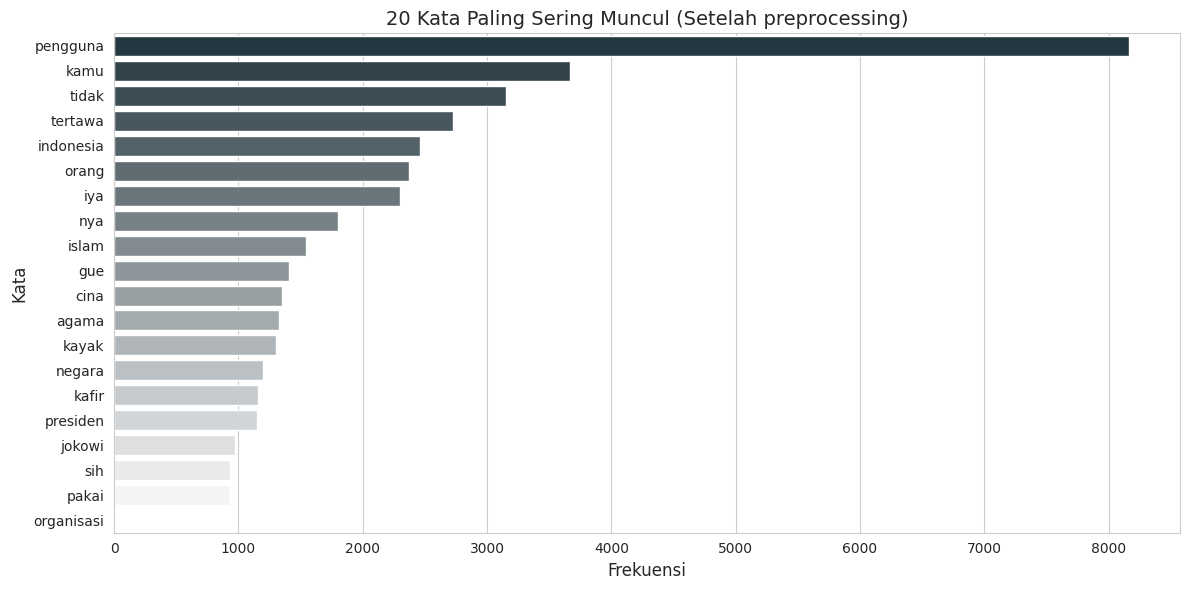

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import to_rgb

# Ambil dan olah kata
all_words = ''.join(data['normalisasi']).split()
word_freq = Counter(all_words)
most_common = word_freq.most_common(20)
words, freqs = zip(*most_common)

# Fungsi gradasi warna dari #213944 ke putih
def generate_gradient(color_hex, steps):
    base_rgb = to_rgb(color_hex)  # Konversi ke RGB tuple
    gradient_colors = []
    for i in range(steps):
        factor = i / (steps - 1)  # dari 0 ke 1
        r = base_rgb[0] + (1 - base_rgb[0]) * factor
        g = base_rgb[1] + (1 - base_rgb[1]) * factor
        b = base_rgb[2] + (1 - base_rgb[2]) * factor
        gradient_colors.append((r, g, b))
    return gradient_colors

# Buat gradasi 20 warna dari #213944 ke putih
gradient_palette = generate_gradient('#213944', 20)

# Buat plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
bars = sns.barplot(x=list(freqs), y=list(words), palette=gradient_palette)

plt.title("20 Kata Paling Sering Muncul (Setelah preprocessing)", fontsize=14)
plt.xlabel("Frekuensi", fontsize=12)
plt.ylabel("Kata", fontsize=12)
plt.tight_layout()
plt.show()


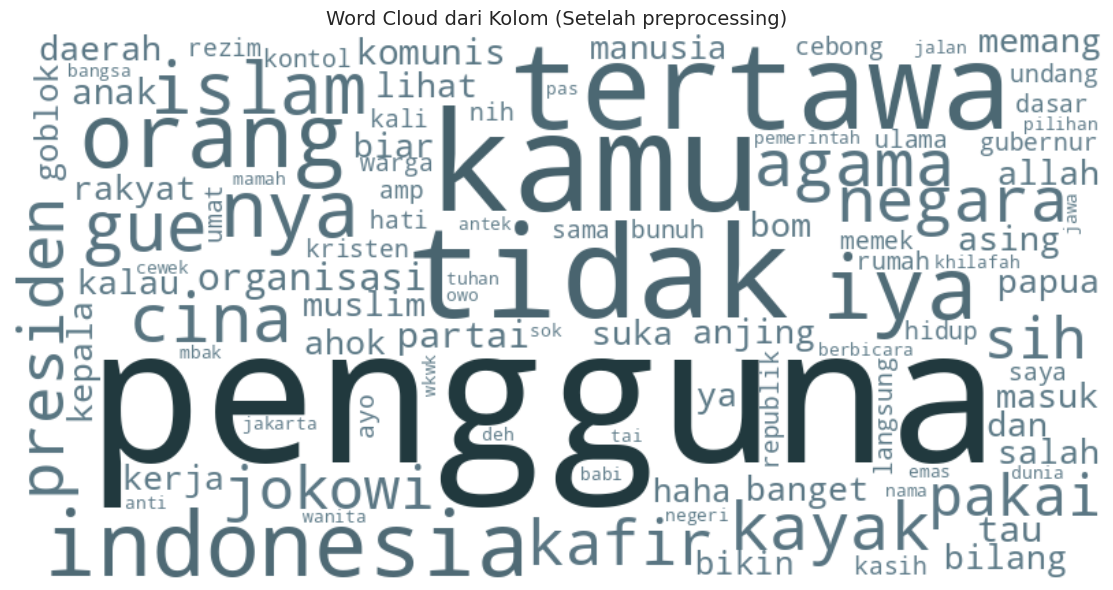

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
import numpy as np
from collections import Counter

# Hitung frekuensi kata
word_freq = Counter(all_words)

# Normalisasi frekuensi untuk digunakan dalam gradasi warna
max_freq = max(word_freq.values())

# Fungsi untuk memberi warna berdasarkan frekuensi
def color_by_frequency(word, font_size, position, orientation, font_path, random_state):
    freq = word_freq.get(word, 0)
    norm_freq = freq / max_freq  # Skala 0–1
    # Warna gradasi dari biru muda (tinggi nilai RGB) ke biru tua
    r = int(99 + (33 - 99) * norm_freq)   # dari 99 ke 33
    g = int(128 + (57 - 128) * norm_freq) # dari 128 ke 57
    b = int(142 + (62 - 142) * norm_freq) # dari 142 ke 62
    return rgb2hex((r / 255, g / 255, b / 255))

# Buat WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    color_func=color_by_frequency
).generate_from_frequencies(word_freq)

# Tampilkan hasil
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud dari Kolom (Setelah preprocessing)", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
bigrams = list(ngrams(all_words, 2))
bigram_freq = Counter(bigrams).most_common(20)

print("\n🔗 20 Bigram Paling Umum:")
for pair, freq in bigram_freq:
    print(f"{pair[0]} {pair[1]}: {freq}")


🔗 20 Bigram Paling Umum:
pengguna pengguna: 4446
tertawa tertawa: 2566
partai komunis: 423
komunis indonesia: 348
kepala daerah: 323
owo owo: 294
pilihan kepala: 287
republik indonesia: 281
kesatuan republik: 242
negara kesatuan: 237
dewan perwakilan: 214
perwakilan rakyat: 195
tenaga kerja: 176
subhanahu wa: 170
undang undang: 167
umat islam: 167
wa taala: 155
daerah khusus: 153
khusus ibukota: 148
komisi pemberantasan: 136


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
data = data

X = data['normalisasi']
y = data['label']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# **FETURE ENGINERING**

## Tf-idf

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)

## Bag of Words

In [ ]:
vectorizer1 = CountVectorizer(max_features=1000, ngram_range=(1, 3))

# **MODELING**

## Tanpa SMOTE

### SVM (TF-IDF)

In [ ]:
X_train_tfidf_svm = vectorizer.fit_transform(X_train)
X_test_tfidf_svm = vectorizer.transform(X_test)

model_svm = SVC(kernel='linear')
model_svm.fit(X_train_tfidf_svm, y_train)

SVC(kernel='linear')

Accuracy: 0.9271762720038582
F1-Score: 0.9171462668810778
Recall: 0.9271762720038582
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      3764
           1       0.70      0.38      0.49       383

    accuracy                           0.93      4147
   macro avg       0.82      0.68      0.72      4147
weighted avg       0.92      0.93      0.92      4147



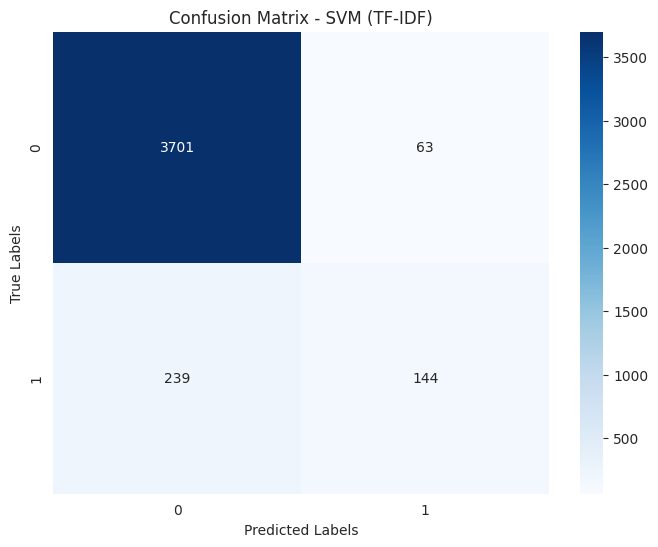

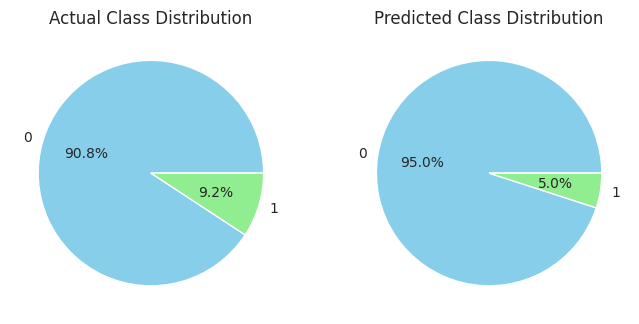

In [ ]:
y_pred_SVM = model_svm.predict(X_test_tfidf_svm)

accuracy = accuracy_score(y_test, y_pred_SVM)
f1 = f1_score(y_test, y_pred_SVM, average='weighted')
recall = recall_score(y_test, y_pred_SVM, average='weighted')

print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Recall:", recall)
print("Classification Report:\n", classification_report(y_test, y_pred_SVM))

tfidf_svm = confusion_matrix(y_test, y_pred_SVM)

plt.figure(figsize=(8, 6))
sns.heatmap(tfidf_svm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - SVM (TF-IDF)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

plt.figure(figsize=(8, 6))

actual_counts = np.bincount(y_test)
predicted_counts = np.bincount(y_pred_SVM)

labels = label_encoder.classes_

plt.subplot(1, 2, 1)
plt.pie(actual_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Actual Class Distribution')

plt.subplot(1, 2, 2)
plt.pie(predicted_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Predicted Class Distribution')

plt.show()

### SVM (BOW)

In [ ]:
X_train_bow_svm = vectorizer1.fit_transform(X_train)
X_test_bow_svm = vectorizer1.transform(X_test)

model_svm = SVC(kernel='linear')
model_svm.fit(X_train_tfidf_svm, y_train)

SVC(kernel='linear')

Accuracy: 0.7342657342657343
F1-Score: 0.7809836390053019
Recall: 0.7342657342657343
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84      3764
           1       0.13      0.34      0.19       383

    accuracy                           0.73      4147
   macro avg       0.53      0.56      0.52      4147
weighted avg       0.85      0.73      0.78      4147



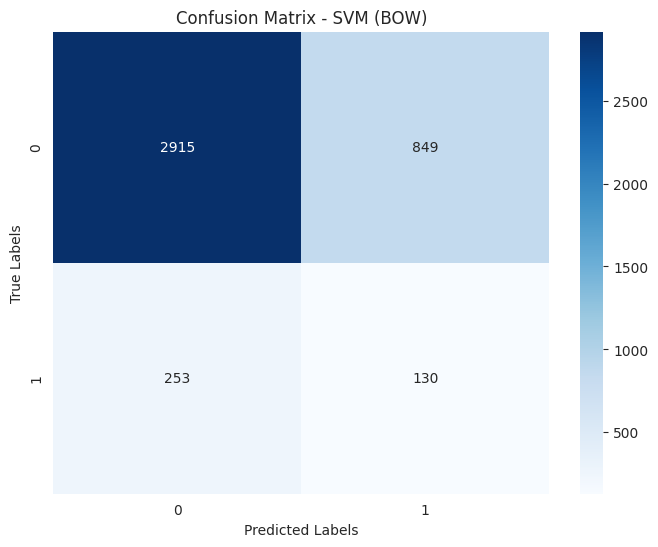

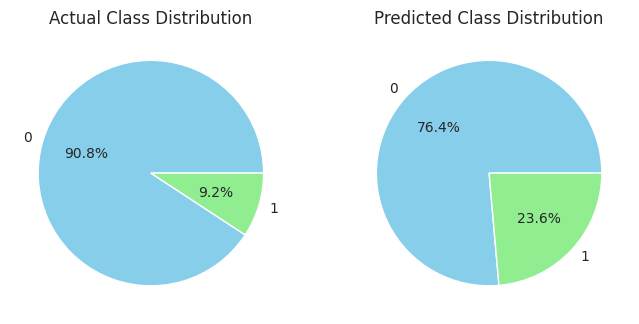

In [ ]:
y_pred_svm = model_svm.predict(X_test_bow_svm)

accuracy = accuracy_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm, average='weighted')
recall = recall_score(y_test, y_pred_svm, average='weighted')

print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Recall:", recall)
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

bow_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(bow_svm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - SVM (BOW)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

plt.figure(figsize=(8, 6))

actual_counts = np.bincount(y_test)
predicted_counts = np.bincount(y_pred_svm)

labels = label_encoder.classes_

plt.subplot(1, 2, 1)
plt.pie(actual_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Actual Class Distribution')

plt.subplot(1, 2, 2)
plt.pie(predicted_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Predicted Class Distribution')

plt.show()

### Random forest (TF-IDF)

In [ ]:
X_train_tfidf_rf = vectorizer.fit_transform(X_train)
X_test_tfidf_rf = vectorizer.transform(X_test)

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_tfidf_rf, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.9319990354473113
F1-Score: 0.923729616714725
Recall: 0.9319990354473113
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      3764
           1       0.73      0.42      0.53       383

    accuracy                           0.93      4147
   macro avg       0.84      0.70      0.75      4147
weighted avg       0.92      0.93      0.92      4147



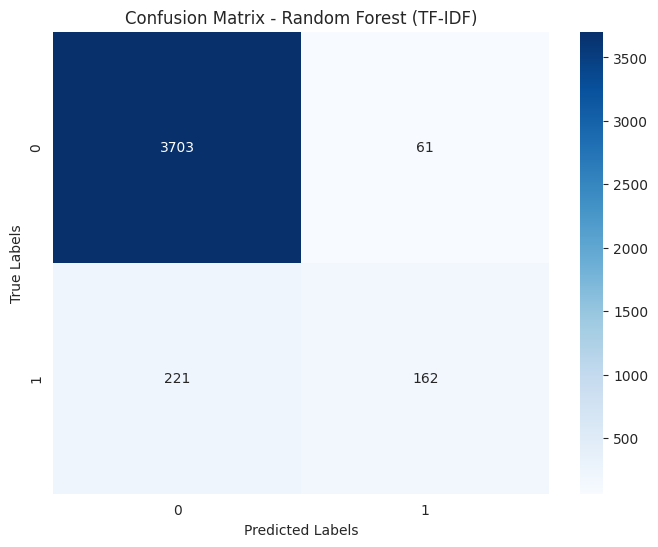

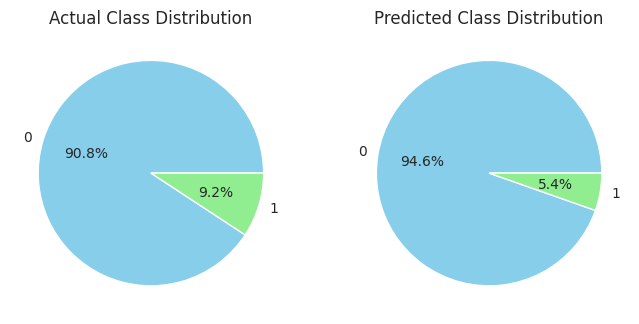

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_rf = model_rf.predict(X_test_tfidf_rf)

accuracy = accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')

print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Recall:", recall)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

tf_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(tf_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Random Forest (TF-IDF)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

plt.figure(figsize=(8, 6))

actual_counts = np.bincount(y_test)
predicted_counts = np.bincount(y_pred_rf)

labels = label_encoder.classes_

plt.subplot(1, 2, 1)
plt.pie(actual_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Actual Class Distribution')

plt.subplot(1, 2, 2)
plt.pie(predicted_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Predicted Class Distribution')

plt.show()

### Random Forest (BOW)

In [ ]:
X_train_bow_rf = vectorizer1.fit_transform(X_train)
X_test_bow_rf = vectorizer1.transform(X_test)

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_tfidf_rf, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.8172172654931276
F1-Score: 0.8216444258784393
Recall: 0.8172172654931276
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      3764
           1       0.06      0.07      0.06       383

    accuracy                           0.82      4147
   macro avg       0.48      0.48      0.48      4147
weighted avg       0.83      0.82      0.82      4147



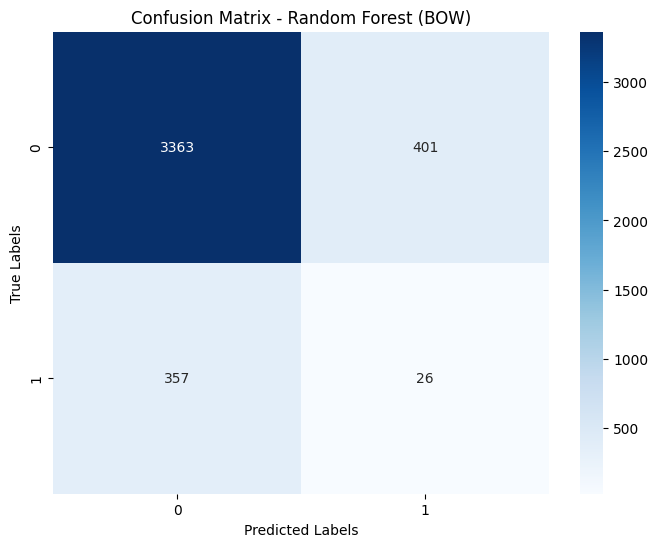

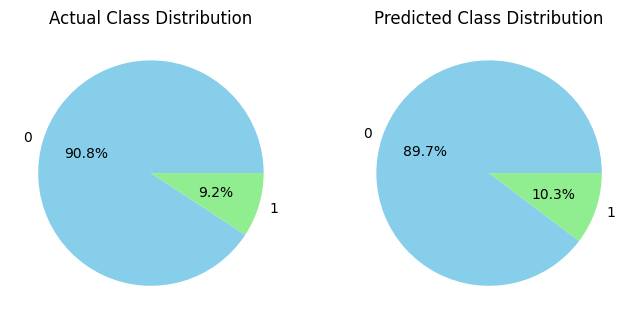

In [ ]:
y_pred_rf = model_rf.predict(X_test_bow_rf)

accuracy = accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')

print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Recall:", recall)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

bow_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(bow_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Random Forest (BOW)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

plt.figure(figsize=(8, 6))

actual_counts = np.bincount(y_test)
predicted_counts = np.bincount(y_pred_rf)

labels = label_encoder.classes_

plt.subplot(1, 2, 1)
plt.pie(actual_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Actual Class Distribution')

plt.subplot(1, 2, 2)
plt.pie(predicted_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Predicted Class Distribution')

plt.show()

### Naive Bayes (TF-IDF)

In [ ]:
X_train_tfidf_nb = vectorizer.fit_transform(X_train)
X_test_tfidf_nb = vectorizer.transform(X_test)

In [ ]:
model_dnb = MultinomialNB()
model_dnb.fit(X_train_tfidf_nb, y_train)

MultinomialNB()

Accuracy: 0.9201832650108512
F1-Score: 0.8947727915478563
Recall: 0.9201832650108512
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      3764
           1       0.85      0.16      0.28       383

    accuracy                           0.92      4147
   macro avg       0.89      0.58      0.62      4147
weighted avg       0.91      0.92      0.89      4147



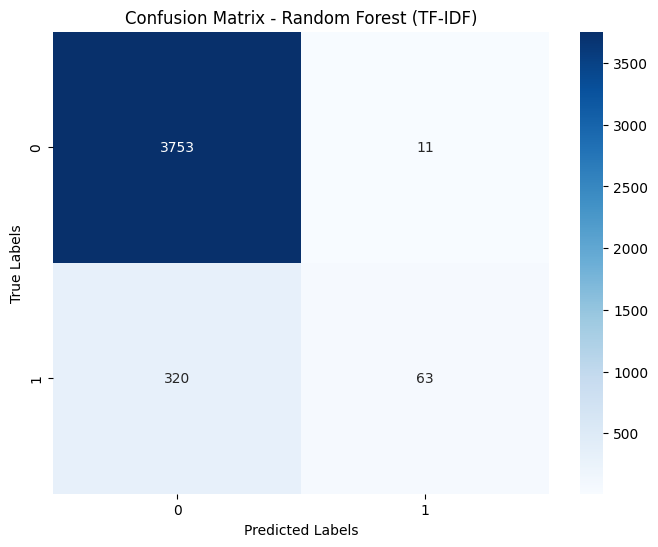

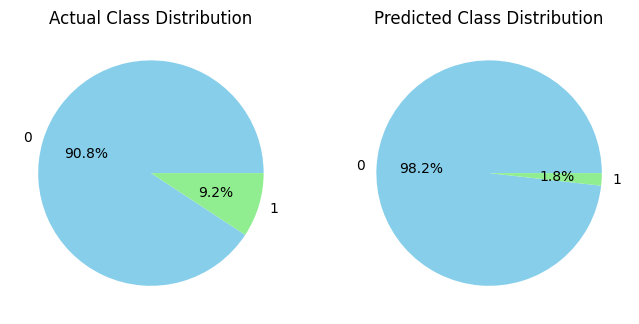

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_nb = model_dnb.predict(X_test_tfidf_nb)

accuracy = accuracy_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb, average='weighted')
recall = recall_score(y_test, y_pred_nb, average='weighted')

print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Recall:", recall)
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

tf_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(tf_nb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Random Forest (TF-IDF)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

plt.figure(figsize=(8, 6))

actual_counts = np.bincount(y_test)
predicted_counts = np.bincount(y_pred_nb)

labels = label_encoder.classes_

plt.subplot(1, 2, 1)
plt.pie(actual_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Actual Class Distribution')

plt.subplot(1, 2, 2)
plt.pie(predicted_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Predicted Class Distribution')

plt.show()

### Naive Bayes (BOW)

In [ ]:
X_train_bow_nb = vectorizer1.fit_transform(X_train)
X_test_bow_nb = vectorizer1.transform(X_test)

In [ ]:
model_dnb = MultinomialNB()
model_dnb.fit(X_train_bow_nb, y_train)

MultinomialNB()

Accuracy: 0.8726790450928382
F1-Score: 0.8875415878785455
Recall: 0.8726790450928382
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      3764
           1       0.39      0.69      0.50       383

    accuracy                           0.87      4147
   macro avg       0.68      0.79      0.71      4147
weighted avg       0.91      0.87      0.89      4147



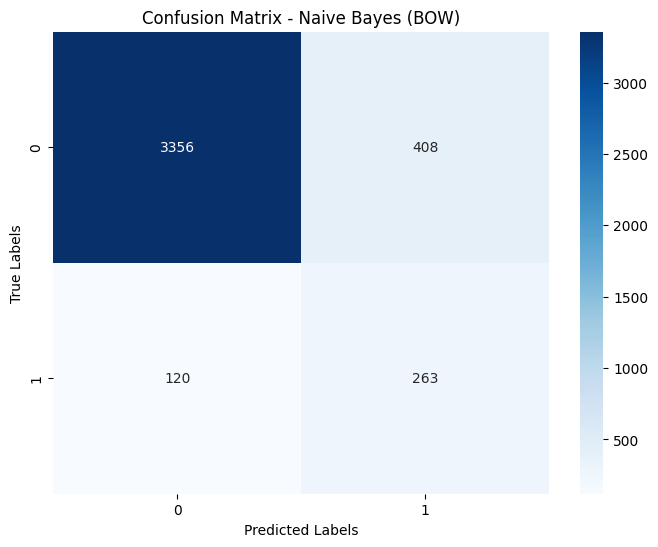

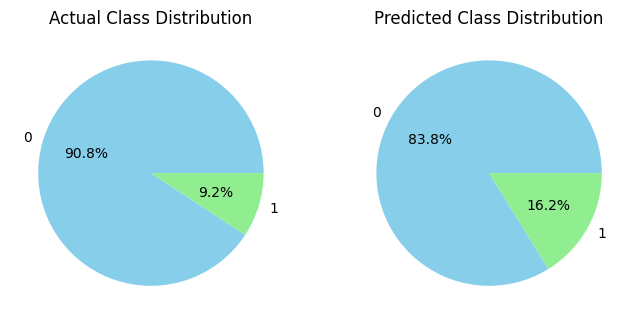

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_nb = model_dnb.predict(X_test_bow_nb)

accuracy = accuracy_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb, average='weighted')
recall = recall_score(y_test, y_pred_nb, average='weighted')

print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Recall:", recall)
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

bow_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(bow_nb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Naive Bayes (BOW)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

plt.figure(figsize=(8, 6))

actual_counts = np.bincount(y_test)
predicted_counts = np.bincount(y_pred_nb)

labels = label_encoder.classes_

plt.subplot(1, 2, 1)
plt.pie(actual_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Actual Class Distribution')

plt.subplot(1, 2, 2)
plt.pie(predicted_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Predicted Class Distribution')

plt.show()


## **SMOTE**

In [ ]:
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])

<ipython-input-128-3934957de110>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label_encoded'] = label_encoder.fit_transform(data['label'])


In [ ]:
X = data['normalisasi']
y = data['label_encoded']
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **FETURE ENGINERING**

In [ ]:
vectorizers = {
    'TF-IDF': TfidfVectorizer(max_features=1000),
    'BoW': CountVectorizer(max_features=1000, ngram_range=(1, 3))
}

### **MODELING (SVM, RANDOM FOREST, DAN NAIVE BAYES) DENGAN SMOTE**

In [ ]:
models = {
    'SVM': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'NaiveBayes': MultinomialNB()
}


===== Feature Engineering: TF-IDF =====

Model: SVM with TF-IDF
Accuracy: 0.8517000241138172
F1-Score: 0.8742336169470373
Recall: 0.8517000241138172
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91      3764
           1       0.36      0.78      0.49       383

    accuracy                           0.85      4147
   macro avg       0.67      0.82      0.70      4147
weighted avg       0.92      0.85      0.87      4147



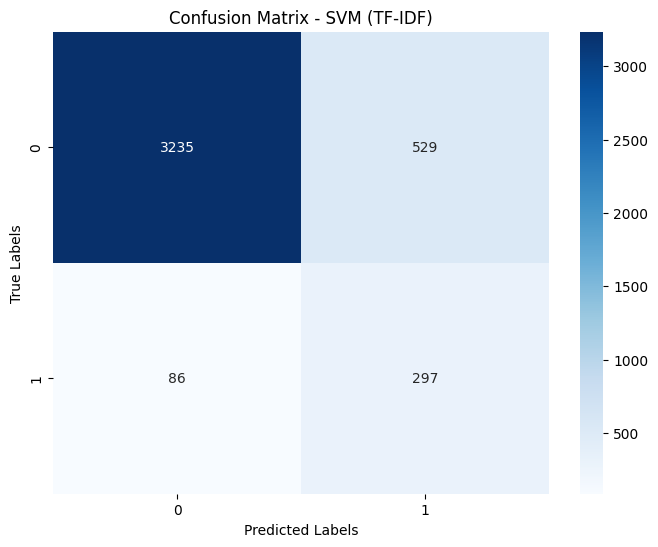

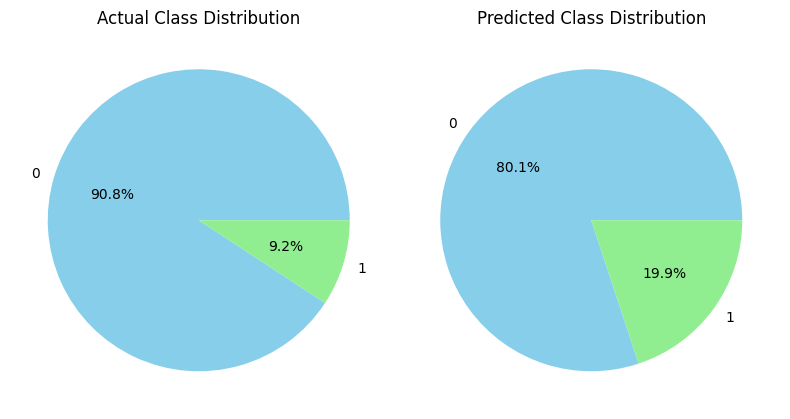


Model: RandomForest with TF-IDF
Accuracy: 0.923800337593441
F1-Score: 0.9259573249014615
Recall: 0.923800337593441
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      3764
           1       0.58      0.66      0.61       383

    accuracy                           0.92      4147
   macro avg       0.77      0.80      0.79      4147
weighted avg       0.93      0.92      0.93      4147



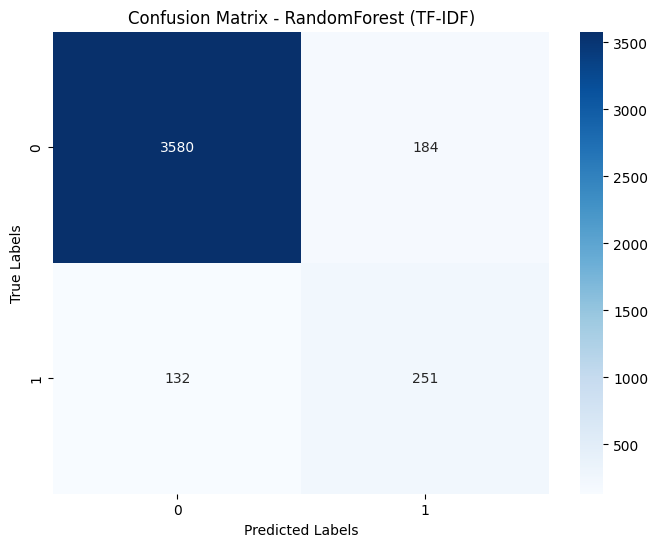

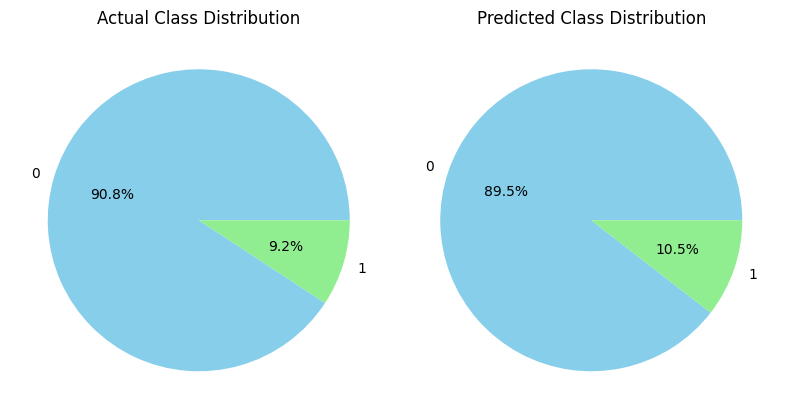


Model: NaiveBayes with TF-IDF
Accuracy: 0.8205931999035447
F1-Score: 0.8513179773988848
Recall: 0.8205931999035447
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.89      3764
           1       0.31      0.76      0.44       383

    accuracy                           0.82      4147
   macro avg       0.64      0.79      0.67      4147
weighted avg       0.91      0.82      0.85      4147



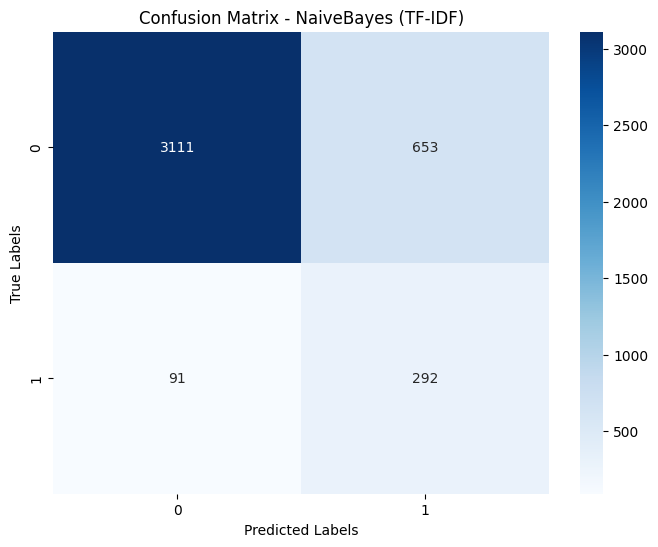

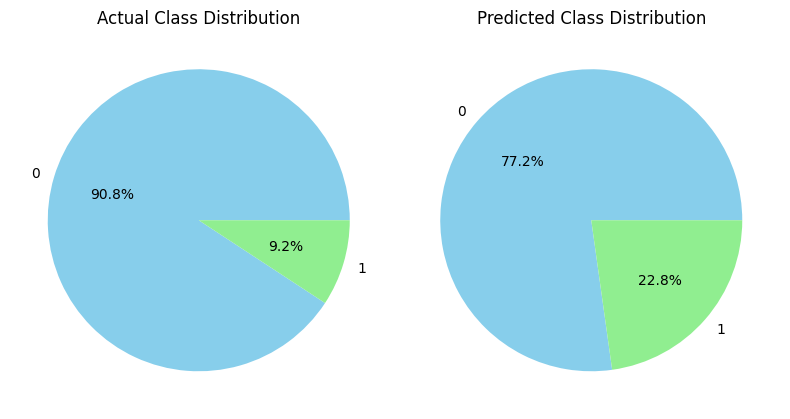


===== Feature Engineering: BoW =====

Model: SVM with BoW
Accuracy: 0.8374728719556306
F1-Score: 0.8597402106690851
Recall: 0.8374728719556306
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91      3764
           1       0.31      0.60      0.41       383

    accuracy                           0.84      4147
   macro avg       0.63      0.73      0.66      4147
weighted avg       0.90      0.84      0.86      4147



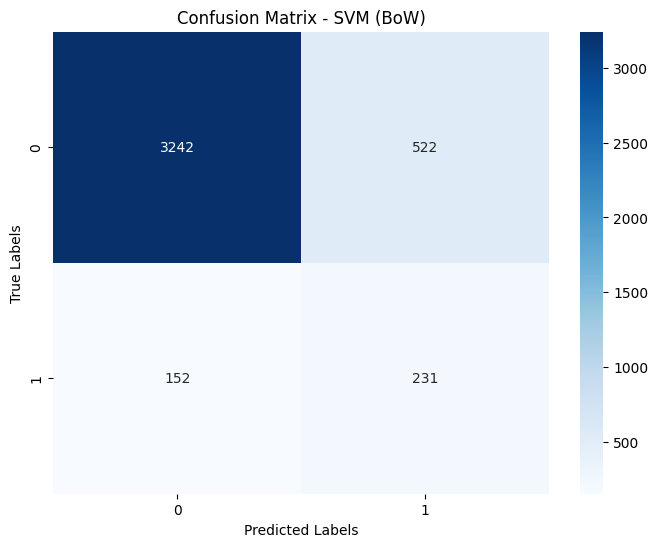

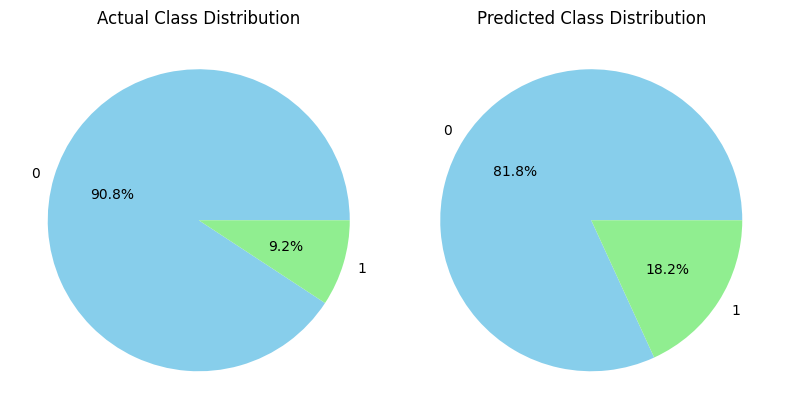


Model: RandomForest with BoW
Accuracy: 0.850494333252954
F1-Score: 0.8701524658581155
Recall: 0.850494333252954
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91      3764
           1       0.34      0.64      0.44       383

    accuracy                           0.85      4147
   macro avg       0.65      0.76      0.68      4147
weighted avg       0.90      0.85      0.87      4147



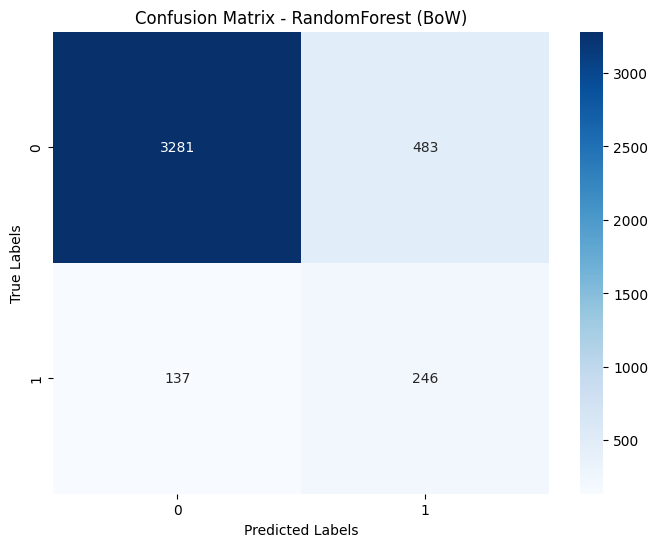

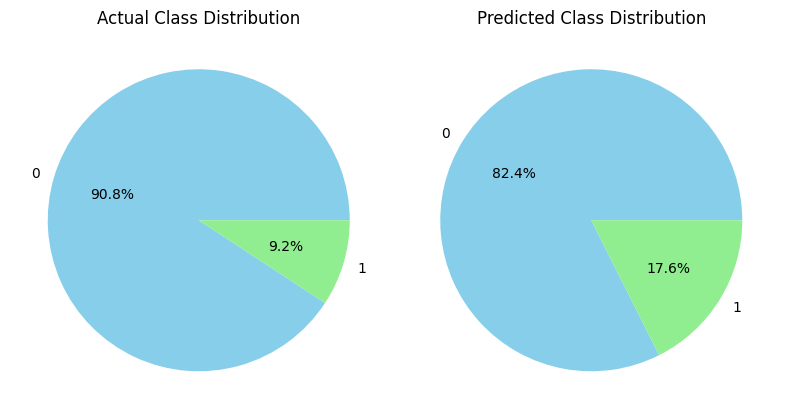


Model: NaiveBayes with BoW
Accuracy: 0.842777911743429
F1-Score: 0.8659715644547217
Recall: 0.842777911743429
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91      3764
           1       0.33      0.70      0.45       383

    accuracy                           0.84      4147
   macro avg       0.65      0.78      0.68      4147
weighted avg       0.91      0.84      0.87      4147



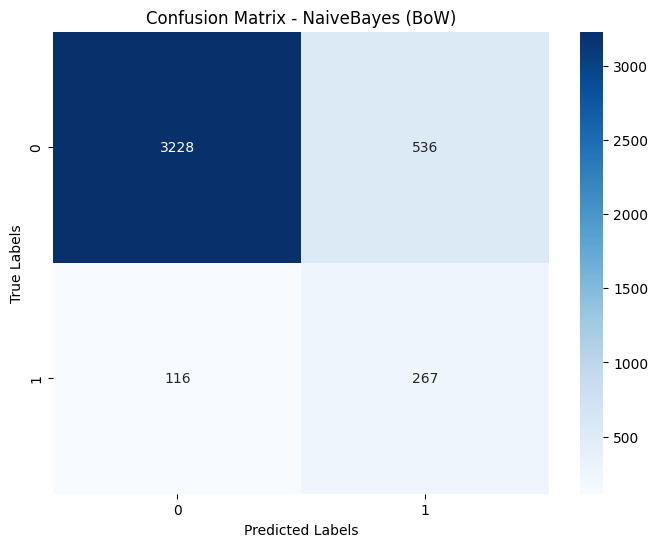

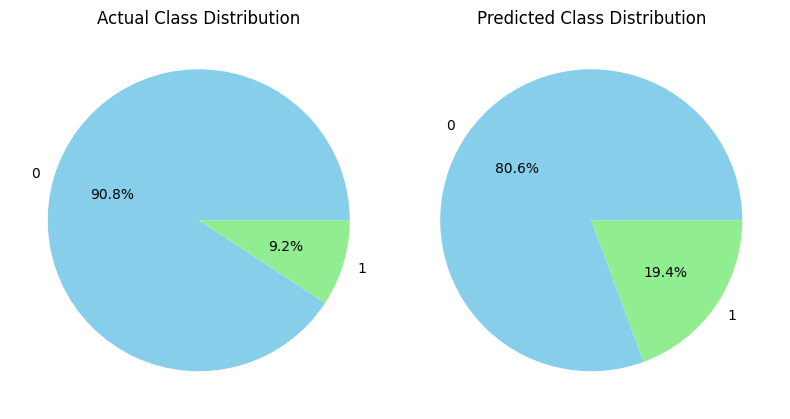

In [ ]:
for vec_name, vectorizer in vectorizers.items():
    print(f"\n===== Feature Engineering: {vec_name} =====")

    X_train_vec_raw = vectorizer.fit_transform(X_train_raw)
    X_test_vec = vectorizer.transform(X_test_raw)

    smote = SMOTE(random_state=42)
    X_train_vec, y_train_res = smote.fit_resample(X_train_vec_raw, y_train)

    for model_name, model in models.items():
        print(f"\nModel: {model_name} with {vec_name}")

        model.fit(X_train_vec, y_train_res)

        y_pred = model.predict(X_test_vec)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')

        print("Accuracy:", accuracy)
        print("F1-Score:", f1)
        print("Recall:", recall)
        print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_.astype(str)))

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=label_encoder.classes_.astype(str),
                    yticklabels=label_encoder.classes_.astype(str))
        plt.title(f'Confusion Matrix - {model_name} ({vec_name})')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()

        actual_counts = np.bincount(y_test)
        predicted_counts = np.bincount(y_pred)
        labels = label_encoder.classes_.astype(str)

        plt.figure(figsize=(8, 6))

        plt.subplot(1, 2, 1)
        plt.pie(actual_counts, labels=labels, autopct='%1.1f%%',
                colors=['skyblue', 'lightgreen', 'lightcoral'])
        plt.title('Actual Class Distribution')

        plt.subplot(1, 2, 2)
        plt.pie(predicted_counts, labels=labels, autopct='%1.1f%%',
                colors=['skyblue', 'lightgreen', 'lightcoral'])
        plt.title('Predicted Class Distribution')

        plt.tight_layout()
        plt.show()